In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from timeit import default_timer as timer

def iterator(f, loops=10, **kwargs):
    start = timer()
    for i in range(0, loops):
        f(**kwargs)
    end = timer()
    return ((end - start) / loops)

def product(matrix):
    length = matrix.shape[0]
    ones = np.ones((1, length))
    return np.dot(np.dot(ones, stats.norm.pdf(matrix)), ones.T)[0, 0]

def sum_(matrix):
    return np.sum(np.sum(stats.norm.pdf(matrix), 0))

In [2]:
np.random.seed(1234)
sizes = [500, 1000, 2000, 3000, 4000, 5000, 10000]

time_product = []
time_sum = []

for i in range(0, len(sizes)):
    
    x_len = sizes[i]
    x = np.random.normal(size=x_len)
    x_matrix = np.tile(x, (x_len, 1))
    x_pairwise_diff = x_matrix - x_matrix.T

    time_product.append(iterator(product, matrix=x_pairwise_diff))
    time_sum.append(iterator(sum_, matrix=x_pairwise_diff))
    
    print("Size " + str(x_len) + " done.")

Size 500 done.
Size 1000 done.
Size 2000 done.
Size 3000 done.
Size 4000 done.
Size 5000 done.
Size 10000 done.


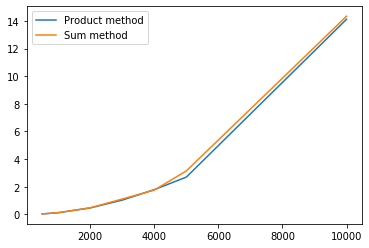

In [7]:
plt.plot(sizes, time_product, label="Product method")
plt.plot(sizes, time_sum, label="Sum method")

plt.legend()
plt.show()

In [8]:
np.array(time_sum) / np.array(time_product)

array([0.99657081, 1.01318865, 1.01556592, 1.07611122, 0.9824626 ,
       1.16629804, 1.01566946])